In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install konlpy
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 23.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=82e3117cdfd19ebf7769af8196117a6639b55c3284119ffe1967137cdf100d14
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl siz

In [ ]:
from google.colab import files
myfile = files.upload()
import pandas as pd

Saving LDA_MBN_AH_ALL.csv to LDA_MBN_AH_ALL.csv


In [ ]:
review_df=pd.read_csv('LDA_MBN_AH_ALL.csv')

# Topic Modeling - LDA: scikit-learn

Tokenization (한글 형태소 쪼개기)

In [ ]:
import konlpy
import re

# tokenization 함수를 만들어둠
def tokenize_korean_text(text):
    text = re.sub(r'[^,.?!\w\s]','', text)  ## ,.?!와 문자+숫자+_(\w)와 공백(\s)만 남김  # 앞에 r을 붙여주면 deprecation warning이 안뜸 (raw string으로 declare)

    okt = konlpy.tag.Okt()
    Okt_morphs = okt.pos(text)   # stem=True로 설정하면 동사원형으로 바꿔서 return

    words = []
    for word, pos in Okt_morphs:
        if pos == 'Adjective' or pos == 'Verb' or pos == 'Noun':  # 이 경우에는 형용사, 동사, 명사만 남김
            words.append(word)

    words_str = ' '.join(words)
    return words_str


# review_df['Content']를 하나씩 tokenize해서 list로 저장
tokenized_list = []

for text in review_df['korean']:
    tokenized_list.append(tokenize_korean_text(text))

print(len(tokenized_list))
print(tokenized_list[0])

18984
기준금리 시대 우리 경제 받는 충격 정도 와 더 자세히 알아보겠습니다 금리 인상 개인 받는 충격 상당할 것 같습니다 이자 부담 늘어날 것 같은데요 기준 금리 하면 실제 은행 시중 돈 빌릴 때 적용 되는 금리 이보 높습니다 주택 담보 대출 금리 사례 설명 드리겠습니다 지난해 초 금리 본격 오르기 전 원 연 금리 빌린 경우 월 이자 부담 원 이었습니다 지금 주택 담보 대출 금리 상단 올랐는데요 월 이자 원 원 더 늘었습니다 인 가구 기준 중위 소득 원 금리 올라 이자 원금 합쳐 매달 원 내게 되면 기본 씀씀이 크게 위축 될 수 없습니다 기준금리 포인트 뛰어도 전체 대출 자의 이자 약 늘어나는데요 지난해 지금 기준금리 포인트 인상 됐으니 늘어난 이자 추산 됩니다 그 말씀 원 시중 사라져 은행 잠겼다는 얘기 잖아요 그럼 장사 하는 사람 물건 파는 기업 크게 위축 될 수 없잖아요 그 여파 눈 앞 고스 란 나타나고 있습니다 오후 서울 황학동 폐업 거리 모습 요 보시 것 장사 돼 폐업 가계 나온 중고 물품 창고 가득 쌓여 있습니다 새로 창업 하려는 사람 없다 보니 폐업 대행 하는 업체 폐업 위기 놓였다고 합니다 기업 이자 부담 상당할 것 같은데요 영업 이익 이자 감당 하지 하는 기업 우리 한계 기업 부르는데요 기준금리 치솟으면서 이런 한계 기업 속출 할 것 보입니다 전국 경제 연합 회 조사 했더니 중소 제조업체 감당 할 수 있는 금리 수준 인 것 나타났습니다 또 다른 조사 결과 보면 국내 기업 곳 중 곳 금리 가 되면 영업 이익 이자 감당 하는 좀비 기업 전락 할 수 있다는 비관 전망 있습니다 앞서 보도 했지만 금리 인상 부동산 시장 받는 충격 상당하잖습니까 지금 부동산 시장 엄청난 시한 폭탄 입니다 금리 때 빚 내 집 산 많으실텐데요 집값 크게 올라 거품 형성 된 상황 금리 오르면 이자 감당 할 수 없고 집은 은행 경매 넘어가게 됩니다 갖고 있는 집 팔아도 출금 갚지 하는 가구 가구 달 합니다 집 리기 하면 다행 거래 아예 뚝 끊겼잖아요 집 팔아서 출금 갚고 

In [ ]:
drop_corpus = []

for index in range(len(tokenized_list)):
    corpus = tokenized_list[index]
    if len(set(corpus.split())) < 3:   # 같은 단어 1-2개만 반복되는 corpus도 지우기 위해 set()을 사용
        review_df.drop(index, axis='index', inplace=True)
        drop_corpus.append(corpus)

for corpus in drop_corpus:
    tokenized_list.remove(corpus)

review_df.reset_index(drop=True, inplace=True)

print(len(tokenized_list))
print(len(review_df))

18958
18958


Vectorization & LDA

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

1. vector화

In [ ]:
#LDA 는 Count기반의 Vectorizer만 적용
count_vectorizer = CountVectorizer(max_df=0.1, max_features=1000, min_df=2, ngram_range=(1,2))
    # 2개의 문서 미만으로 등장하는 단어는 제외, 전체의 10% 이상으로 자주 등장하는 단어는 제외
    # bigram도 포함

feat_vect = count_vectorizer.fit_transform(tokenized_list)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (18958, 1000)


2. 토픽모델링: LDA

In [ ]:
!pip install tmtoolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.6.3-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (9.4 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.2
    Uninstalling matplotlib-3.1.2:
      Successfully uninstalled matplotlib-3.1.2


In [ ]:
lda = LatentDirichletAllocation(n_components=6, random_state=0)  # 토픽 수는 6개로 설정
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=6, random_state=0)

In [ ]:
# import tmtoolkit
# from tmtoolkit.topicmod.evaluate import metric_coherence_gensim
# def topic_model_coherence_generator(topic_num_start=2,
#                                     topic_num_end=25,
#                                     norm_corpus='',
#                                     cv_matrix='',
#                                     cv=''):
#     norm_corpus_tokens = [doc.split() for doc in norm_corpus]
#     models = []
#     coherence_scores = []

#     for i in range(topic_num_start, topic_num_end):
#         print(i)
#         cur_lda = LatentDirichletAllocation(n_components=i, random_state=0)
#         cur_lda.fit_transform(cv_matrix)
#         cur_coherence_score = metric_coherence_gensim(
#             measure='c_v',
#             top_n=10,
#             topic_word_distrib=cur_lda.components_,
#             dtm=cv.fit_transform(norm_corpus),
#             vocab=np.array(cv.get_feature_names()),
#             texts=norm_corpus_tokens)
#         models.append(cur_lda)
#         coherence_scores.append(np.mean(cur_coherence_score))
#     return models, coherence_scores

3. 토픽별 연관어 출력

In [ ]:
def display_topics(model, feature_names, num_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)

        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환.
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:num_top_words]

        # top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])
        print(feature_concat)

# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vectorizer.get_feature_names()

# Topic별 가장 연관도가 높은 word를 10개만 추출
display_topics(lda, feature_names, 10)

Topic # 0
남성 여성 아이 영상 피해자 신고 선수 발견 범행 답변
Topic # 1
북한 위원장 대선 후보 선거 지사 바이든 경선 이준석 안철수 이낙연
Topic # 2
사고 주택 아파트 차량 가격 업체 시장 부동산 직원 사업
Topic # 3
감염 접종 백신 검사 두기 거리 두기 신규 단계 병원 환자
Topic # 4
기온 남부 아침 러시아 우크라이나 제주 동해안 강원 날씨 지방
Topic # 5
백신 접종 법무부 당선인 청와대 후보자 총장 국회 검사 인사


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


LDA 시각화: pyLDAvis

In [ ]:
# import pyLDAvis.sklearn  # sklearn의 ldamodel에 최적화된 라이브러리

# pyLDAvis.enable_notebook()
# vis = pyLDAvis.sklearn.prepare(lda, feat_vect, count_vectorizer)
# pyLDAvis.display(vis)

문서별 토픽 할당
1. 각 문서별로 가장 가까운 topic으로 할당

In [ ]:
# 문서별로, 가장 확률이 높은 topic으로 할당해줌

doc_topic = lda.transform(feat_vect)

doc_per_topic_list = []
for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()
    topic_pr = doc_topic[n].max()
    doc_per_topic_list.append([n, topic_most_pr, topic_pr])

doc_topic_df = pd.DataFrame(doc_per_topic_list, columns=['Doc_Num', 'Topic', 'Percentage'])

doc_topic_df.head()

,Doc_Num,Topic,Percentage
0,0,2,0.963899
1,1,2,0.947549
2,2,2,0.443041
3,3,4,0.979609
4,4,2,0.818112


실제 내용과 join

In [ ]:
doc_topic_df = doc_topic_df.join(review_df)
doc_topic_df.head()

ValueError: ignored

In [ ]:
doc_topic_df.print_topics(num_words=30)

2. 토픽별 문서 수 계산

In [ ]:
doc_topic_df.groupby('Topic')[['Doc_Num']].count()

,Doc_Num
Topic,
0,3717
1,4270
2,3950
3,3019
4,1061
5,2941


3. 토픽별로, 가장 높은 확률로 할당된 문서 top 3 확인

In [ ]:
for topic in range(len(doc_topic_df['Topic'].unique())):
    print('Topic #', topic, '-----------------------------')
    top_pr_topics = doc_topic_df[doc_topic_df['Topic'] == topic].sort_values(by='Percentage', ascending=False)
    print(top_pr_topics['korean'].iloc[0])
    print(top_pr_topics['korean'].iloc[1])
    print(top_pr_topics['korean'].iloc[2], '\n')

Topic # 0 -----------------------------

  키워드로 살펴보는 오늘의 화제 픽뉴스 시간입니다
  오늘은 권용범 와 이야기를 나눠 보도록 하겠습니다


【 질문 11 】
  권  첫 번째 키워드는 뭔가요?



  터널로 날아든 비행기입니다


【 질문 12 】
  비행기가 길을 잃었나요?



  이탈리아 출신 한 스턴트 조종사가 터키에서 아찔한 도전에 나섰는데요

  세계 최장 터널 비행에 도전한 겁니다

  비행 영상 직접 보시겠습니다

  터널 안에서 비행기가 속도를 내더니 바퀴가 땅에서 떨어지며 비행을 시작합니다

  날개가 터널 벽에 닿을 듯 말 듯한데요

  비행기는 아슬아슬하게 두 개의 터널을 지나 하늘로 솟구치고 조종사는 환호합니다

  평균 시속 245㎞로 지상 1m 높이를 유지한 채 터널 구간 16㎞ 비행에 성공해 기네스 기록을 새로 썼습니다


【 질문 21 】
  두 번째 키워드는 뭔가요?



  무단횡단에 비접촉인데…입니다


【 질문 22 】
  어디서 무슨 일이 있었던 건가요?



  전북 익산시에서 있었던 사고인데요

  당시 블랙박스 영상부터 보시겠습니다

 2차선 도로를 천천히 달리는 차량

  갑자기 왼쪽에서 모자를 쓴 여성이 나타나자 차량이 급하게 멈춰 서고 놀란 여성은 앞으로 고꾸라집니다

  그런데 자세히 보시면 차량과 여성은 닿지 않은 걸로 보입니다


【 질문 23 】
  비접촉 사고라면 운전자는 책임질 게 없는 게 아닌가요?



  상식적으로 그렇게 생각할 수 있는데 그렇지 않은 상황이 생겼습니다

 운전자는 여성이 Xray와 MRI 비용 70만 원에 뇌 사진까지 찍어보겠다며 합의금 100만 원을 요구했다고 주장했습니다

  보험사에서도 치료비가 계속 나올 걸 우려해 합의를 권고했고 결국 운전자가 합의를 해주며 사건은 일단락됐다고 하는데요

  누리꾼들은 강하게 받아쳐야 한다 보험 사기로 신고해라 등의 격한 반응을 보이기도 했습니다



  세 번째 키워드는 뭔가요?



  싹

# Topic Modeling - LDA: gensim

In [ ]:
# ## sklearn을 활용한 LDA에서와 같은 데이터를 사용

# review_df.head()

Tokenization

In [ ]:
import konlpy
import re

def tokenize_korean_text(text):
    text = re.sub(r'[^,.?!\w\s]','', text)

    okt = konlpy.tag.Okt()
    Okt_morphs = okt.pos(text)

    words = []
    for word, pos in Okt_morphs:
        if pos == 'Adjective' or pos == 'Verb' or pos == 'Noun':
            words.append(word)
    ## word를 이어붙인 string 형태가 아닌 word의 list를 return해주는 게 sklearn lda 준비 과정과의 차이

    return words


tokenized_list = []

for text in review_df['korean']:
    tokenized_list.append(tokenize_korean_text(text))

print(len(tokenized_list))
print(tokenized_list[1])

18984
['폭풍', '구름', '엄습', '추운', '겨울', '닥친다', '국제통화기금', '가', '내년', '세계', '경제', '내다보며', '한', '말', '입니다', '수출', '먹고사는', '우리', '당연히', '예외', '아니죠', '이창용', '한국은행', '총재', '부동산', '추가', '하락', '할', '가능성', '있다며', '빚', '내', '집', '산', '사람', '고통', '클', '것', '말', '했습니다', '부동산', '가격', '가계부채', '증가', '율', '조정', '되는', '것', '고통스러운', '면', '있어', '죄송한', '마음', '들', '기도', '이자', '못', '갚아', '신용', '불량', '되고', '집', '경매', '넘어가며', '한계', '기업', '쓰러지는', '쓰나미', '몰려올', '수', '있다는', '고등', '켜진', '겁니다']


+) 단어가 1-2개만 포함된 corpus는 삭제

In [ ]:
drop_corpus = []

for index in range(len(tokenized_list)):
    corpus = tokenized_list[index]
    if len(set(corpus)) < 3:   # corpus 자체가 list 형태인게 sklearn lda 준비 과정과의 차이
        review_df.drop(index, axis='index', inplace=True)
        drop_corpus.append(corpus)

for corpus in drop_corpus:
    tokenized_list.remove(corpus)

review_df.reset_index(drop=True, inplace=True)

Vectorization & LDA

In [ ]:
# bigram 생성에 필요한 library
from gensim.models import Phrases
from gensim.models.phrases import Phraser

# vectorize & lda에 필요한 library
from gensim import corpora
from gensim.models.ldamodel import LdaModel

1. bigram을 포함하기 위한 추가 세팅

In [ ]:
# Build the bigram models
bigram = Phrases(tokenized_list, min_count=4, threshold=10)
bigram_mod = Phraser(bigram)

# See example
print(bigram_mod[tokenized_list[0]])

['기준금리_시대', '우리_경제', '받는', '충격', '정도', '와', '더_자세히', '알아보겠습니다', '금리_인상', '개인', '받는', '충격', '상당할_것', '같습니다', '이자_부담', '늘어날_것', '같은데요', '기준', '금리', '하면', '실제', '은행', '시중', '돈_빌릴', '때', '적용_되는', '금리', '이보', '높습니다', '주택_담보', '대출_금리', '사례', '설명_드리겠습니다', '지난해', '초', '금리', '본격', '오르기_전', '원', '연', '금리', '빌린', '경우', '월', '이자_부담', '원', '이었습니다', '지금', '주택_담보', '대출_금리', '상단', '올랐는데요', '월', '이자', '원', '원', '더', '늘었습니다', '인_가구', '기준_중위', '소득_원', '금리', '올라', '이자', '원금', '합쳐', '매달_원', '내게', '되면', '기본', '씀씀이', '크게_위축', '될_수', '없습니다', '기준금리_포인트', '뛰어도', '전체', '대출', '자의', '이자', '약', '늘어나는데요', '지난해', '지금', '기준금리_포인트', '인상', '됐으니', '늘어난_이자', '추산_됩니다', '그', '말씀', '원', '시중', '사라져', '은행', '잠겼다는', '얘기', '잖아요', '그럼', '장사', '하는', '사람', '물건', '파는', '기업', '크게_위축', '될_수', '없잖아요', '그', '여파', '눈', '앞', '고스_란', '나타나고_있습니다', '오후', '서울', '황학동', '폐업', '거리', '모습_요', '보시', '것', '장사', '돼', '폐업', '가계', '나온', '중고_물품', '창고_가득', '쌓여_있습니다', '새로', '창업', '하려는_사람', '없다_보니', '폐업', '대행', '하는', '업체', '폐업', '위기', '놓였다고', '합니다', '기업', 

gensim.models.Phrases: 자동으로 ngram colloation을 detect하는 모델. Phrases를 반복 사용하면 bigram뿐 아니라 trigram과 그 이상도 생성 가능
*   min_count: 최소한 min_count보다 많이 등장한 token이 대상
*   threshold: default는 10, 값이 작을수록 덜 빈번한 단어 조합이더라도 bigram으로 생성해준다. 아주 빈번하게 사용되는 최소한의 bigram만 만들고자 하면 threshold를 높여주면 된다

In [ ]:
# tokenized_list의 모든 문서에 대해 bigram을 생성해줌
words_bigram = [bigram_mod[doc] for doc in tokenized_list]

2. vector화

In [ ]:
dictionary = corpora.Dictionary(words_bigram)  # 각 단어에 번호를 할당해줌
    # bigram 포함하는 과정을 생략하고 싶으면, 그냥 바로 여기에 tokenized_list를 넣어주면 됨

dictionary.filter_extremes(no_below=2, no_above=0.05)
    # 2개의 문서 미만으로 등장하는 단어는 제외, 전체의 5% 이상으로 자주 등장하는 단어는 제외

corpus = [dictionary.doc2bow(text) for text in words_bigram]
print(corpus[0]) # 첫번째 corpus를 테스트로 출력: 몇 번째 단어가 몇 번 나왔는지 저장되어 있음

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 9), (27, 1), (28, 2), (29, 1), (30, 1), (31, 1), (32, 7), (33, 1), (34, 2), (35, 1), (36, 2), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 2), (57, 2), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 3), (82, 2), (83, 1), (84, 1), (85, 1), (86, 1), (87, 3), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 2), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1),

**Coherence Score**

In [ ]:
# import matplotlib.pyplot as plt
# from tmtoolkit.topicmod.evaluate import metric_coherence_gensim

# # lda_model - LatentDirichletAllocation()
# # vect - CountVectorizer()
# # texts - the list of tokenized words
# ts = 2
# te = 4
# models, coherence_values = topic_model_coherence_generator(
#     ts, te, norm_corpus=tokenized_list, cv=count_vectorizer, cv_matrix=feat_vect)

In [ ]:
passes=50 #default 1 # 훈련 동안 말뭉치를 통과하는 횟수
iterations=10000  #default 50 # 말뭉치를 읽는 반복시행의 최대수

In [ ]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

coherence_values = []
for i in range(2,15):
  ldamodel = LdaModel(corpus, num_topics=i, id2word=dictionary, random_state=0, passes=passes, iterations =iterations)
  coherence_model_lda=CoherenceModel(model=ldamodel, texts=words_bigram, dictionary=dictionary, topn=10)
  coherence_lda=coherence_model_lda.get_coherence()
  coherence_values.append(coherence_lda)

In [ ]:
!pip uninstall matplotlib
!pip install matplotlib==3.1.2

Found existing installation: matplotlib 3.2.2
Uninstalling matplotlib-3.2.2:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.2.2-py3.8-nspkg.pth
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.2.2.dist-info/*
    /usr/local/lib/python3.8/dist-packages/matplotlib.libs/libpng16-cfdb1654.so.16.21.0
    /usr/local/lib/python3.8/dist-packages/matplotlib.libs/libz-a147dcb0.so.1.2.3
    /usr/local/lib/python3.8/dist-packages/matplotlib/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.8/dist-packages/pylab.py
Proceed (Y/n)? Y
  Successfully uninstalled matplotlib-3.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/

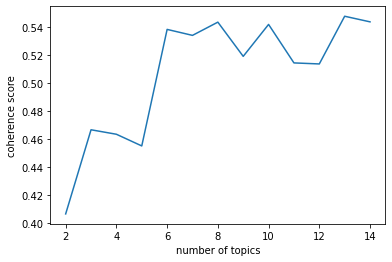

In [ ]:
x=range(2,15)
plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

import numpy as np

In [ ]:
values = []
for i, val in enumerate(coherence_values):
  values.append((i+2,val))

values = sorted(values, key=lambda val:val[1], reverse=True)
print(values)
top = 0
print(f'top : {values[top]}')
mid = len(values) // 2
print(f'mid : {values[mid]}')

top_topics = values[top][0]
mid_topics = values[mid][0]

[(13, 0.5476608447431128), (14, 0.5436630635694686), (8, 0.5434542319915765), (10, 0.541831770451953), (6, 0.5382833956646018), (7, 0.5340262140884876), (9, 0.5190779768392818), (11, 0.5144055348440489), (12, 0.5136674224315944), (3, 0.4667564569030711), (4, 0.4635665136881403), (5, 0.4552406213695722), (2, 0.406794704932911)]
top : (13, 0.5476608447431128)
mid : (9, 0.5190779768392818)


3. LDA 모델 학습 & 연관어 확인

In [ ]:
ldamodel_top = LdaModel(corpus, num_topics=top_topics, id2word=dictionary, random_state=0, passes=passes, iterations =iterations)

ldamodel_top.print_topics(num_words=30)  # num_words=10이 default

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

[(0,
  '0.008*"감염" + 0.007*"단계" + 0.007*"신규_확" + 0.006*"진자_명" + 0.005*"코로나_신규" + 0.005*"백신_접종" + 0.004*"윤석열_국민" + 0.004*"시설" + 0.004*"환자" + 0.004*"집단_감염" + 0.004*"병원" + 0.004*"진자" + 0.004*"차_접종" + 0.003*"기록_했습니다" + 0.003*"확산" + 0.003*"제한" + 0.003*"확진" + 0.003*"확산_세" + 0.003*"코로나_확" + 0.003*"다음_주" + 0.003*"증가" + 0.002*"접종" + 0.002*"위중_증" + 0.002*"코로나_확산" + 0.002*"당국" + 0.002*"검토" + 0.002*"두기_단계" + 0.002*"강대_엽" + 0.002*"인_이상" + 0.002*"금지"'),
 (1,
  '0.006*"총장" + 0.006*"선거" + 0.005*"윤석열_전" + 0.005*"윤_전" + 0.005*"민주당_대선" + 0.005*"대선_후보" + 0.005*"이재명_더불어" + 0.005*"검찰총장" + 0.004*"이재명_후보" + 0.004*"이_대표" + 0.004*"힘_대선" + 0.004*"투표" + 0.004*"민주당_대표" + 0.004*"경선" + 0.004*"안철수_국민의당" + 0.004*"윤석열_후보" + 0.003*"선_대위" + 0.003*"여론조사" + 0.003*"지지율" + 0.003*"힘_대표" + 0.003*"이준석_대표" + 0.003*"공약" + 0.003*"토론" + 0.003*"이준석_국민" + 0.003*"전_대표" + 0.003*"최고_위원" + 0.003*"지지" + 0.003*"일화" + 0.003*"이_지사" + 0.002*"이낙연_전"'),
 (2,
  '0.008*"피해자" + 0.006*"아이" + 0.005*"신고" + 0.005*"학생" + 0.005*"병원" + 0.004*"대_남성" + 0.0

In [ ]:
len(corpus)

18958

In [ ]:
# mid topic value
ldamodel_mid = LdaModel(corpus, num_topics=mid_topics, id2word=dictionary, random_state=0, passes=passes, iterations =iterations)  # 토픽 수: 8

ldamodel_mid.print_topics(num_words=30)  # num_words=10이 default

LDA Model의 파라미터:
* passes: Number of passes through the corpus during training. (default: 1)
* iterations: Maximum number of iterations through the corpus when inferring the topic distribution of a corpus. (default: 50)
* corpus 수가 적으면 passes를 높여주는 것이 유용할 수 있고, 시간만 충분하다면 iterations를 높여주면 더 학습이 잘 된다 (iterations가 낮으면 제대로 수렴하기 전에 학습이 종료될 수 있음)



**LDA 시각화: pyLDAvis**

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyLDAvis.gensim_models

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable


In [ ]:
!pip install pandas == 1.2.0

ERROR: Invalid requirement: '=='


In [ ]:
!pip freeze | grep gensim
!pip freeze | grep pyLDAvis

gensim==3.6.0
pyLDAvis==3.3.1


In [ ]:
!pip install gensim --upgrade

In [ ]:
!pip install gensim

import gensim
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
  # gensim의 ldamodel에 최적화된 라이브러리

vis_top = pyLDAvis.gensim_models.prepare(ldamodel_top, corpus, dictionary)
pyLDAvis.display(vis_top)

In [ ]:
vis_mid = pyLDAvis.gensim_models.prepare(ldamodel_mid, corpus, dictionary)
pyLDAvis.display(vis_mid)

In [ ]:
ldamodel = LdaModel(corpus, num_topics=9, id2word=dictionary, random_state=0, passes=passes, iterations =iterations)  # 토픽 수: 6
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

In [ ]:
import pyLDAvis.sklearn
lda = LatentDirichletAllocation(n_components=9, random_state=0)  # 토픽 수는 6개로 설정 #sklearn
lda.fit(feat_vect)
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda, feat_vect, count_vectorizer)
pyLDAvis.display(vis)

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable
/usr/local/lib/python3.8/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keywor

문서별 토픽 할당

In [ ]:
doc_per_topic_list = []

for n in range(len(corpus)):
    doc_topic = ldamodel[corpus[n]]
    doc_topic = sorted(doc_topic, key=lambda x: (x[1]), reverse=True)
    topic_most_pr = doc_topic[0][0]
    topic_pr = doc_topic[0][1]
    doc_per_topic_list.append([n, topic_most_pr, topic_pr])

doc_topic_df = pd.DataFrame(doc_per_topic_list, columns=['Doc_Num', 'Topic', 'Percentage'])

# 실제 review 내용과 join
doc_topic_df = doc_topic_df.join(review_df)

doc_topic_df.head()

,Doc_Num,Topic,Percentage,titles,link,dates,length,views,korean
0,0,4,0.880706,[뉴스추적] 3% 기준금리 시대 개인·기업·국가에 어떤 충격 [MBN 뉴스7],https://youtube.com/watch?v=y-d4bV051iU,2022-10-12,304,8468,\n 3% 기준금리 시대 우리 경제가 받는 충격이 어느 정도인지 와 더 자세히 ...
1,1,4,0.779400,MBN 뉴스7 오프닝 - 2022년 10월 12일 [MBN 뉴스7],https://youtube.com/watch?v=gWOja69PGRc,2022-10-12,62,556,폭풍 구름 엄습 추운 겨울 닥친다\n\n 국제통화기금 IMF가 내년 세계 경제를 ...
2,2,11,0.627837,[김주하의 '그런데'] 혈세로 산 농산물 폐기에 105억 - 2022.10.12 [...,https://youtube.com/watch?v=6CxdHLwRvcA,2022-10-12,190,2185,아야 뛰지 마라배 꺼질라가슴 시린 보릿고개 길\n\n 가수 진성 씨가 직접 노랫말...
3,3,9,0.439511,"[뉴스7 날씨] 당분간 이맘때 가을 날씨, 일교차 커요 [MBN 뉴스7]",https://youtube.com/watch?v=B-0HI57mktI,2022-10-12,94,865,아침 많이 추우셨죠 서울은 65도까지 떨어지면서 또다시 올가을 최저기온을 경신했습니...
4,4,8,0.377064,"미국, 삼성·SK 중국 내 반도체 장비 수출통제 1년 유예 [MBN 뉴스7]",https://youtube.com/watch?v=hvn5PUreeos,2022-10-12,38,708,미 상무부가 삼성전자와 SK하이닉스의 중국 현지 공장에 대해서는 1년간 반도체 장비...


In [ ]:
ldamodel = LdaModel(corpus, num_topics=13, minimum_probability= 0.0, id2word=dictionary, random_state=0, passes=passes, iterations =iterations)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

In [ ]:
doc_per_topic_list = []

for n in range(len(corpus)):
    doc_topic = ldamodel[corpus[n]]
    doc_topic = sorted(doc_topic, key=lambda x: (x[1]), reverse=True)
    topic_most_pr = doc_topic[0][0]
    topic_pr = doc_topic[0][1]
    prob = list(map(lambda x: np.round(x[1], 5), ldamodel[corpus[n]]))
    doc_per_topic_list.append([n, topic_most_pr, topic_pr, prob])

doc_topic_df = pd.DataFrame(doc_per_topic_list, columns=['Doc_Num', 'Topic Classificiation', 'Topic Percentage', 'Topic Probability'])

# 실제 review 내용과 join
doc_topic_df = doc_topic_df.join(review_df)

doc_topic_df.head()

,Doc_Num,Topic Classificiation,Topic Percentage,Topic Probability,titles,link,dates,length,views,korean
0,0,4,0.901771,"[0.00027, 0.00027, 0.00027, 0.03847, 0.90177, ...",[뉴스추적] 3% 기준금리 시대 개인·기업·국가에 어떤 충격 [MBN 뉴스7],https://youtube.com/watch?v=y-d4bV051iU,2022-10-12,304,8468,\n 3% 기준금리 시대 우리 경제가 받는 충격이 어느 정도인지 와 더 자세히 ...
1,1,4,0.772274,"[0.00167, 0.00167, 0.00167, 0.00167, 0.77228, ...",MBN 뉴스7 오프닝 - 2022년 10월 12일 [MBN 뉴스7],https://youtube.com/watch?v=gWOja69PGRc,2022-10-12,62,556,폭풍 구름 엄습 추운 겨울 닥친다\n\n 국제통화기금 IMF가 내년 세계 경제를 ...
2,2,11,0.445839,"[0.00045, 0.00045, 0.00045, 0.00045, 0.21699, ...",[김주하의 '그런데'] 혈세로 산 농산물 폐기에 105억 - 2022.10.12 [...,https://youtube.com/watch?v=6CxdHLwRvcA,2022-10-12,190,2185,아야 뛰지 마라배 꺼질라가슴 시린 보릿고개 길\n\n 가수 진성 씨가 직접 노랫말...
3,3,9,0.986999,"[0.00108, 0.00108, 0.00108, 0.00108, 0.00108, ...","[뉴스7 날씨] 당분간 이맘때 가을 날씨, 일교차 커요 [MBN 뉴스7]",https://youtube.com/watch?v=B-0HI57mktI,2022-10-12,94,865,아침 많이 추우셨죠 서울은 65도까지 떨어지면서 또다시 올가을 최저기온을 경신했습니...
4,4,8,0.848110,"[0.11163, 0.00366, 0.00366, 0.00366, 0.00366, ...","미국, 삼성·SK 중국 내 반도체 장비 수출통제 1년 유예 [MBN 뉴스7]",https://youtube.com/watch?v=hvn5PUreeos,2022-10-12,38,708,미 상무부가 삼성전자와 SK하이닉스의 중국 현지 공장에 대해서는 1년간 반도체 장비...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
doc_topic_df.head()
outfile = '/content/drive/MyDrive/WithKL/topicresults2.csv'
doc_topic_df.to_csv(outfile, index=False, encoding='utf-8')
outfile = '/content/drive/MyDrive/WithKL/topicresults2.xlsx'
doc_topic_df.to_excel(outfile, encoding='utf-8')

In [ ]:
#doc_topic_df.to_excel('topicresults_mbn_ah2.xlsx', index=False, encoding='utf-8')